Created by Jodhi Krisantus Sihalbu

jodhi1911253@itpln.ac.id

# **Holiday Package Prediction**
Menganalisa customer mana yang berpotensi untuk membeli paket wisata 'Wellness Tourism'

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **EXPLORATORY DATA ANALYSIS (EDA)**

In [28]:
df = pd.read_csv(r"C:\Users\jodhi\Documents\RAKAMIN ACADEMY\FINAL PROJECT\DATASET\Travel.csv")
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**CHECK MISSING VALUE**

In [30]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [31]:
categorical = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']

**CHECK DATA DUPLIKAT dan VALUE COUNT (CATEGORICAL)**

**Temuan :**
1. Terdapat 4888 baris Data. Tidak Terdapat data duplikat. Setiap Baris Data tersebut berupa data setiap customer yang berbeda - beda disetiap orangnya

In [32]:
print('Banyak Data : ',df.shape)
print('Jumlah Id Customer Duplikat : ',df['CustomerID'].duplicated().sum())
print('Jumlah Data Duplikat',df.duplicated().sum())

Banyak Data :  (4888, 20)
Jumlah Id Customer Duplikat :  0
Jumlah Data Duplikat 0


**CHECK VALUE COUNT (CATEGORICAL)**

Terdapat Anomali / typo pada kolom gender **(Male,Female,Fe Male)**. Sehingga gender (Fe Male) harus diubah dahulu menjadi Female

In [33]:
for i in categorical:
    print(df[i].value_counts())

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


**FIXING GENDER   (`Fe Male`)  MENJADI `FeMale`**


In [34]:
print("Value count gender : \n", df['Gender'].value_counts())

Value count gender : 
 Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64


In [35]:
new_gender = [ 'Female' if i=='Fe Male' or i=='Female' else 'Male' for i in df['Gender'] ]
df['Gender']=new_gender
print("Value count gender : \n", df['Gender'].value_counts())

Value count gender : 
 Male      2916
Female    1972
Name: Gender, dtype: int64


### **1. UNIVARIATE ANALYSIS**

Product Taken :  (920, 20)
No Product Taken :  (3968, 20)


c:\Users\jodhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\jodhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\jodhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

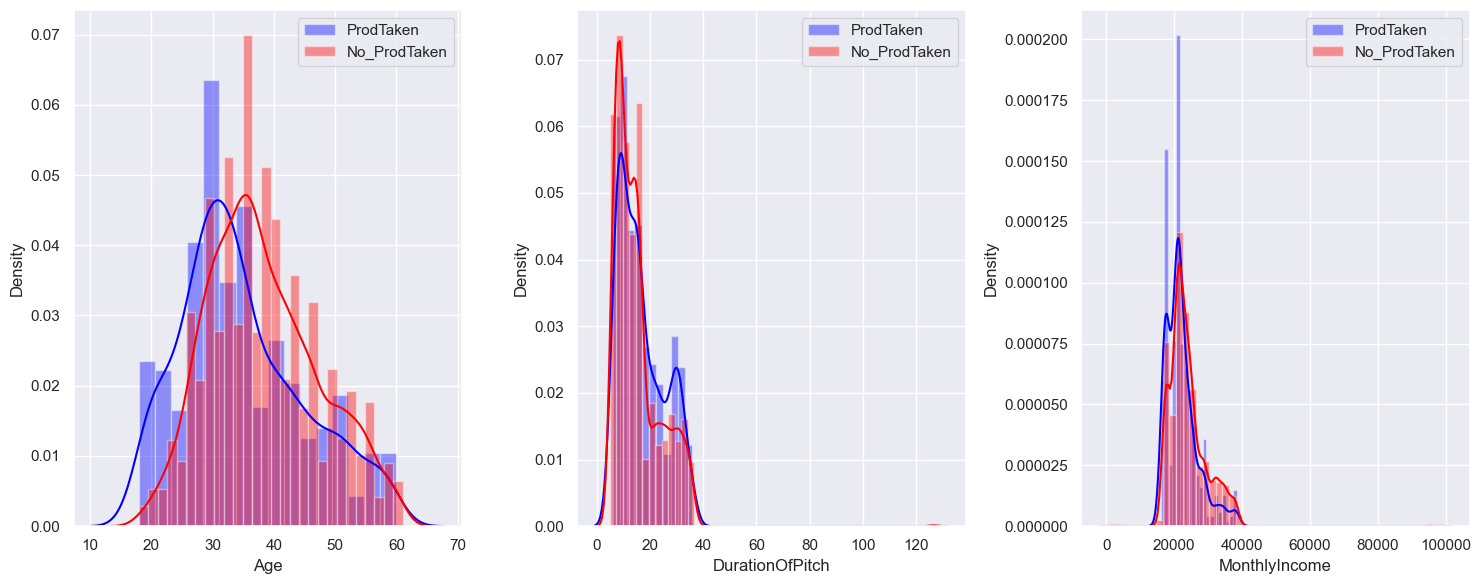

In [36]:
num = ['Age','DurationOfPitch','MonthlyIncome']
df_prodtaken = df[(df['ProdTaken']==1)]
df_no_prodtaken = df[(df['ProdTaken']==0)]

print('Product Taken : ',df_prodtaken.shape)
print('No Product Taken : ',df_no_prodtaken.shape)


fig, axes = plt.subplots(1,3, figsize=(15,6))

for i in range(len(num)):
    sns.distplot(df_prodtaken[num[i]], ax = axes[i],label='ProdTaken',color='blue') 
    sns.distplot(df_no_prodtaken[num[i]], ax = axes[i],label='No_ProdTaken',color='red')
    sns.set_theme(style="darkgrid", palette="pastel")

    axes[i].legend()

plt.tight_layout()
plt.show()

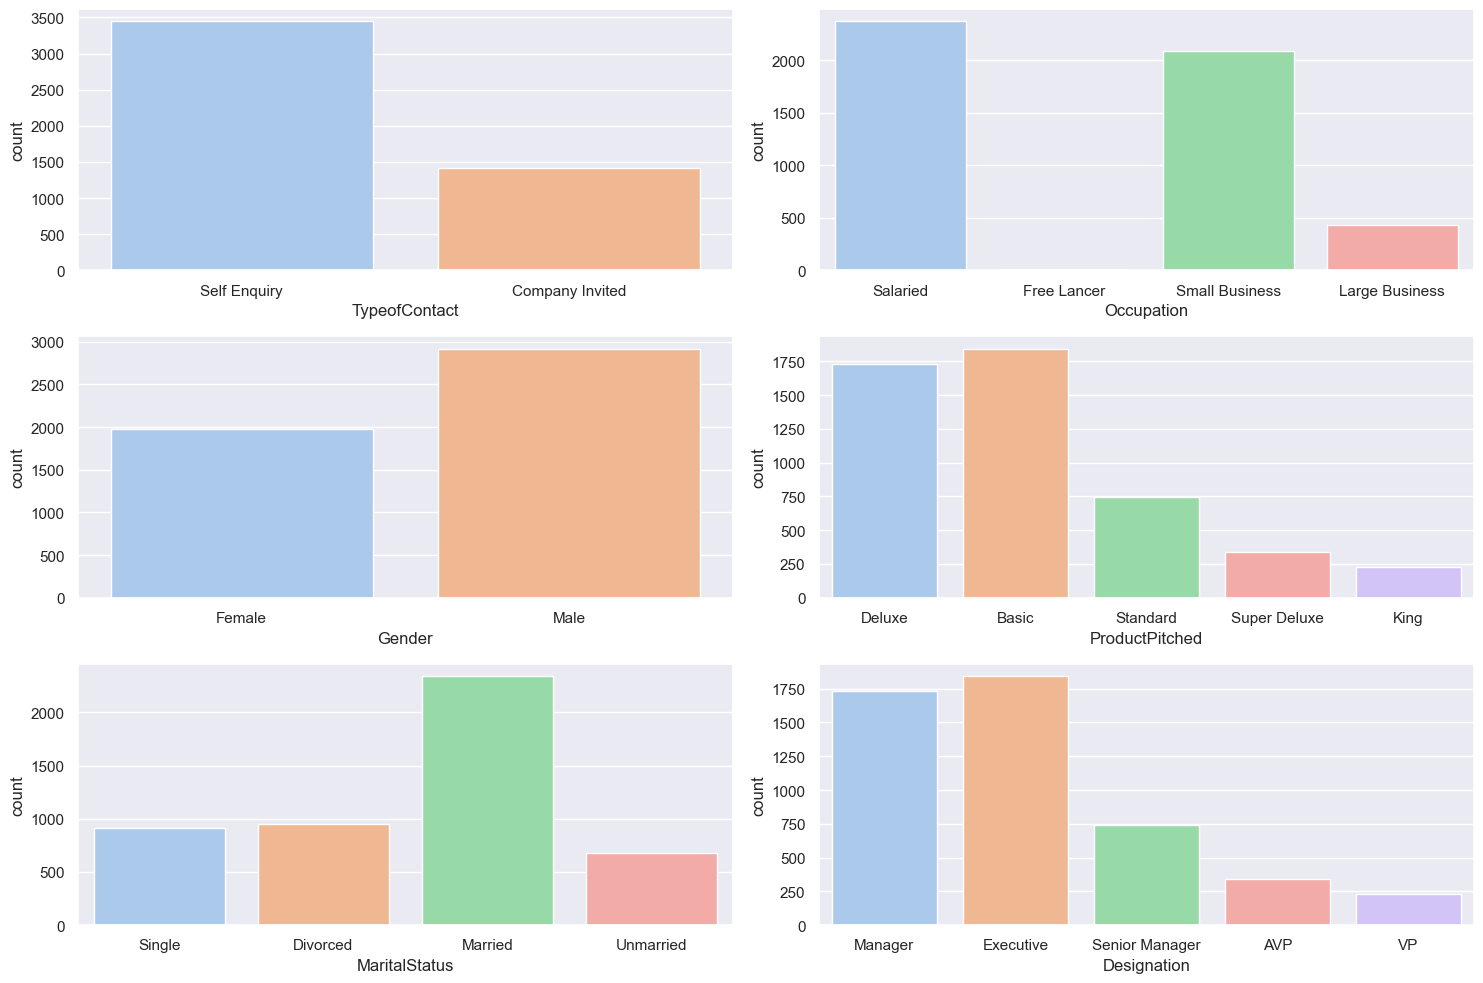

In [37]:
categorical = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
plt.figure(figsize=(15,10))
for i in range (len(categorical)):
    plt.subplot(3,2, i+1)
    sns.countplot(data=df, x=categorical[i])
    sns.set_theme(style="darkgrid", palette="pastel")
    plt.tight_layout()

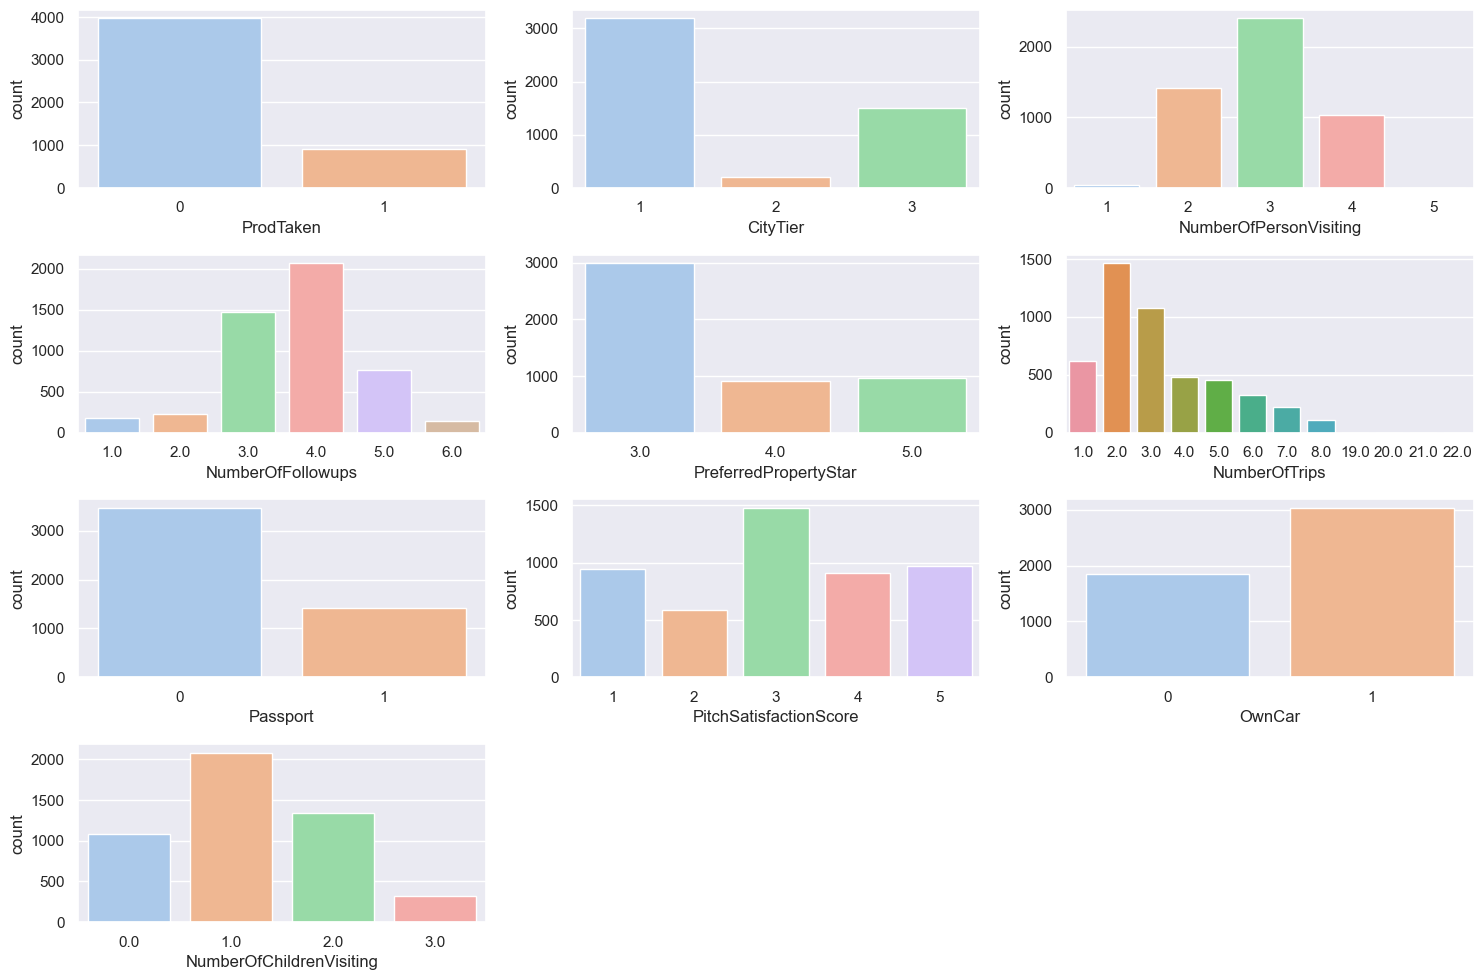

In [38]:
diskrit = ['ProdTaken','CityTier','NumberOfPersonVisiting','NumberOfFollowups',
           'PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore',
           'OwnCar', 'NumberOfChildrenVisiting']

plt.figure(figsize=(15,10))
for i in range(len(diskrit)):
    plt.subplot(4,3, i+1)
    sns.countplot(data=df, x=diskrit[i] )
    sns.set_theme(style="darkgrid", palette="pastel")
    plt.tight_layout()
    

### **2. BIVARIATE ANALYSIS**

Text(0.5, 1.0, 'No Product Taken')

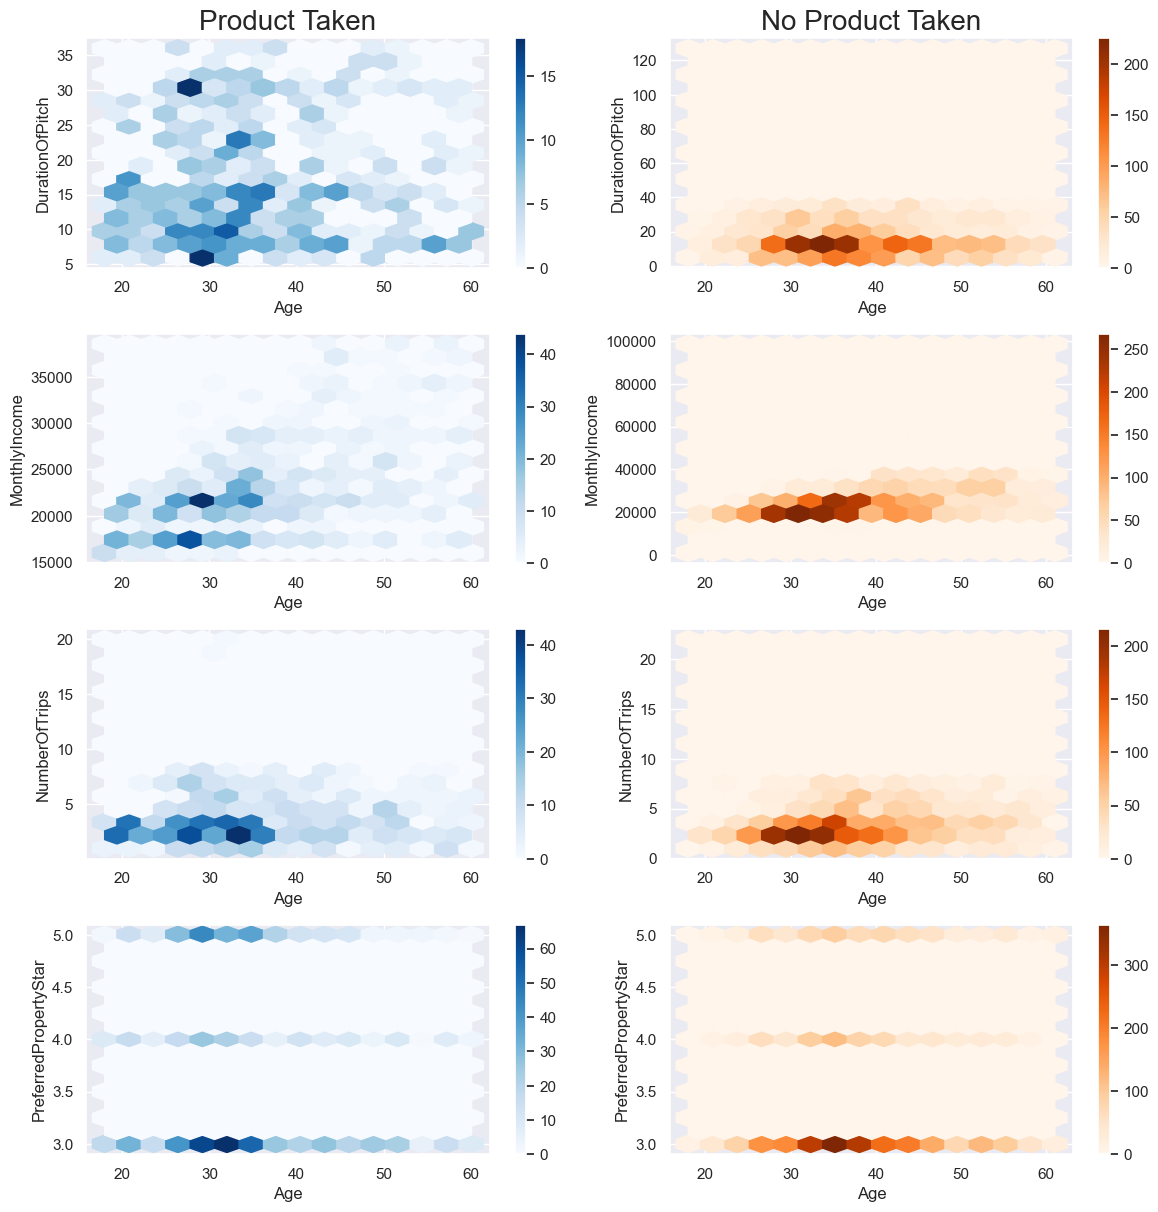

In [39]:
df_prodtaken = df[(df['ProdTaken']==1)]
df_no_prodtaken = df[(df['ProdTaken']==0)]

subset = ['DurationOfPitch','MonthlyIncome','NumberOfTrips','PreferredPropertyStar']

fig, axes = plt.subplots(4,2, figsize = (12,12))
for i in range(4):
    df_prodtaken.plot(kind='hexbin', x='Age', y=subset[i], gridsize=15, colormap='Blues',ax=axes[i,0],label='abb')
    df_no_prodtaken.plot(kind='hexbin', x='Age', y=subset[i], gridsize=15, colormap='Oranges', ax=axes[i,1],label='aa')
plt.tight_layout()
axes[0,0].set_title('Product Taken',fontsize=20)
axes[0,1].set_title('No Product Taken',fontsize = 20)

In [40]:
df.head(1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0


### **3. MULTIVARIATE ANALYSIS**

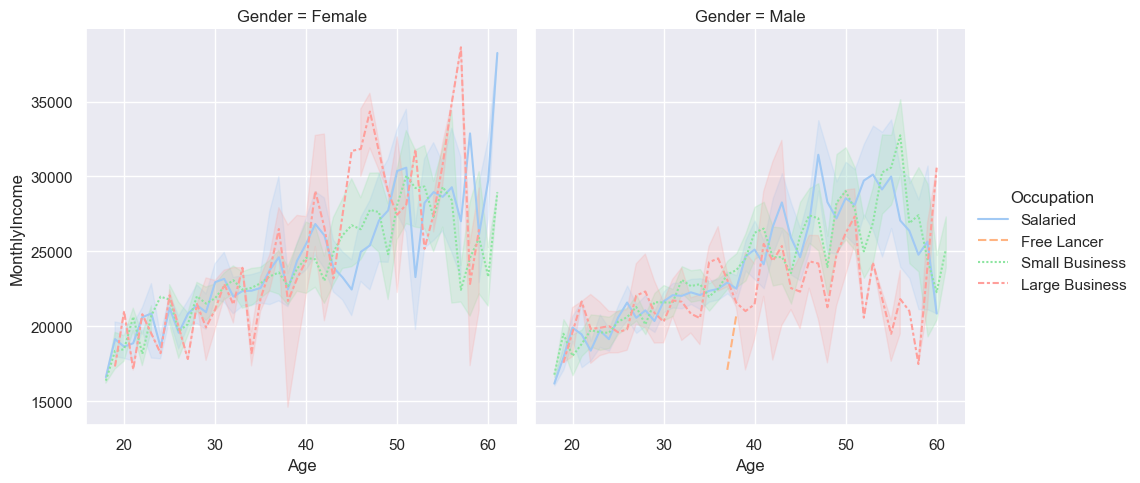

In [41]:
sns.relplot(data=df, x='Age',y='MonthlyIncome', kind='line',  col='Gender',hue='Occupation',style="Occupation")

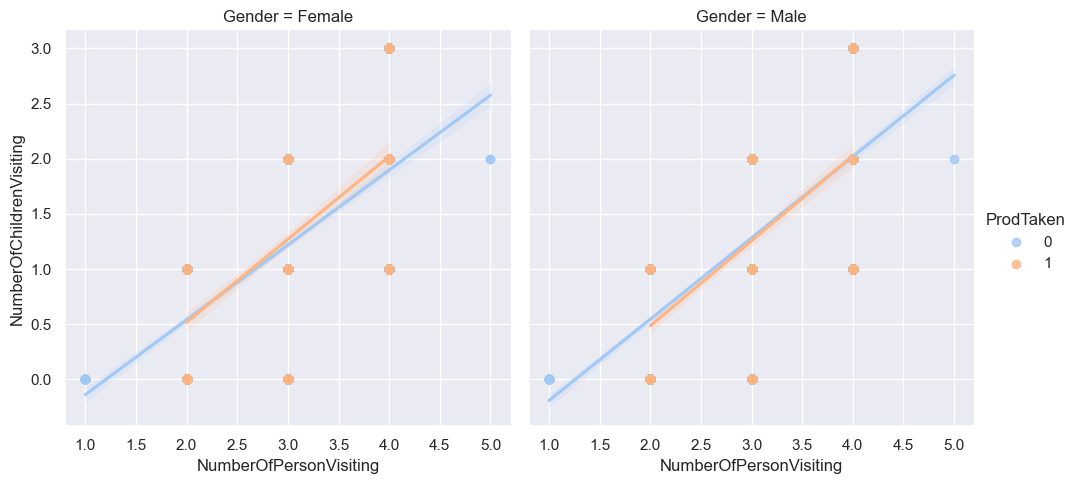

In [42]:
sns.lmplot(data=df,x='NumberOfPersonVisiting', y='NumberOfChildrenVisiting', hue='ProdTaken', col='Gender')

<AxesSubplot:>

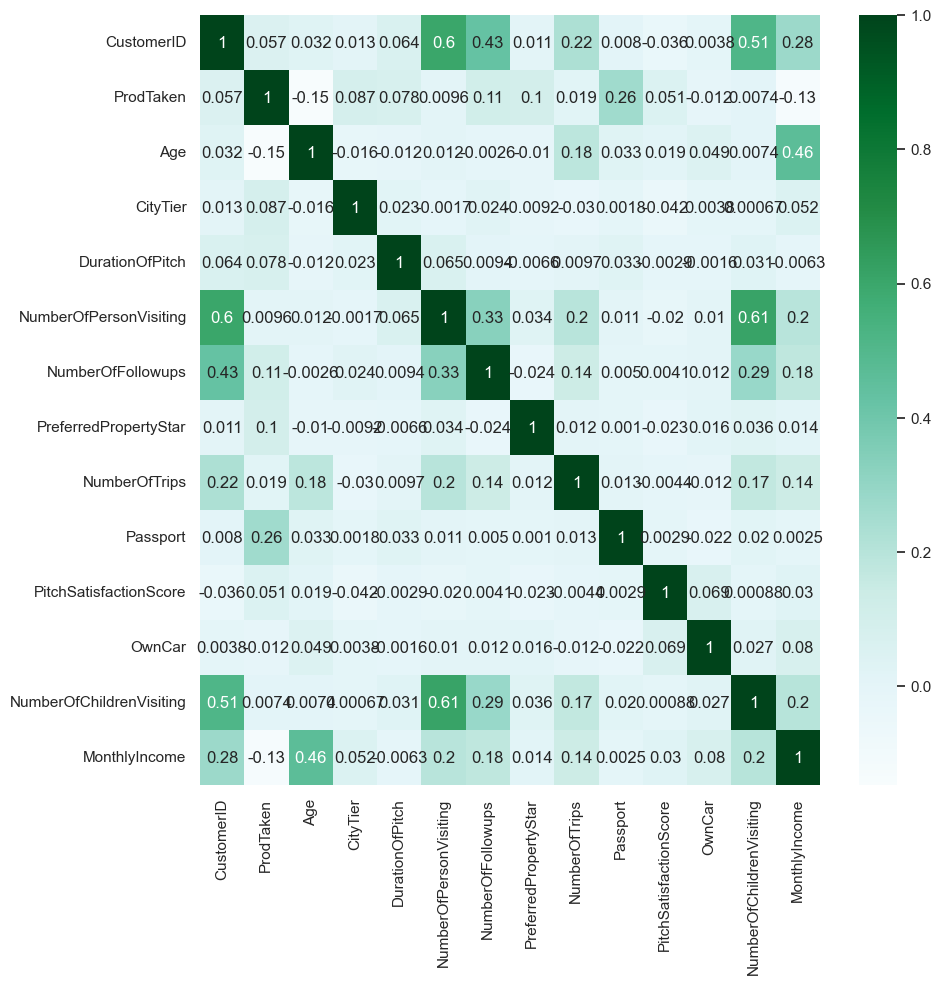

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='BuGn',annot=True)

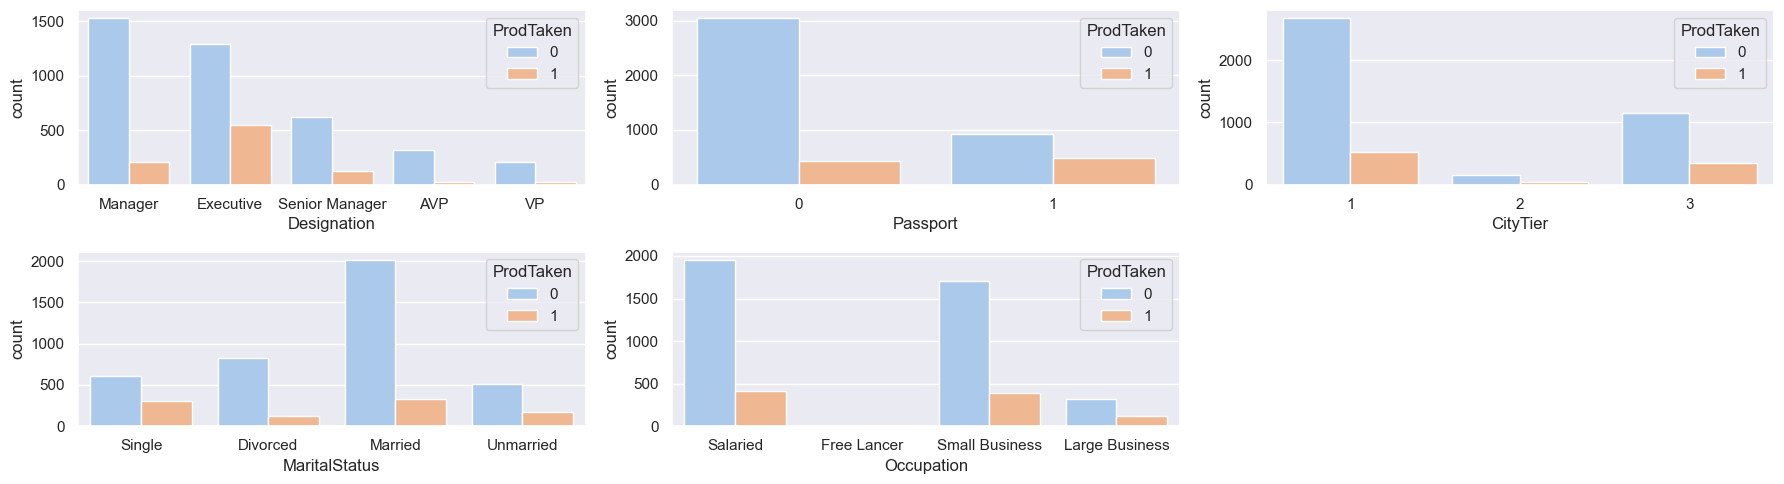

In [44]:
plt.figure(figsize=(18,5))
subset = ['Designation', 'Passport', 'CityTier', 'MaritalStatus', 'Occupation']
for  i in range(len(subset)):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=subset[i], hue='ProdTaken')
plt.tight_layout()


In [45]:
Designation_group = df.groupby(['Designation','ProdTaken'])[['CustomerID']].count().reset_index()

jumlah=pd.DataFrame(df['Designation'].value_counts())
jumlah=jumlah.reset_index()
jumlah.columns=['Designation','sum']
Designation_group = Designation_group.merge(jumlah, on='Designation')

Designation_group['ratio'] = Designation_group['CustomerID'] / Designation_group['sum'] * 100

ycoor = Designation_group[Designation_group['ProdTaken']==1]['ratio'].reset_index()
ycoor['ratio']

0     5.847953
1    29.967427
2    11.778291
3    16.711590
4     8.695652
Name: ratio, dtype: float64

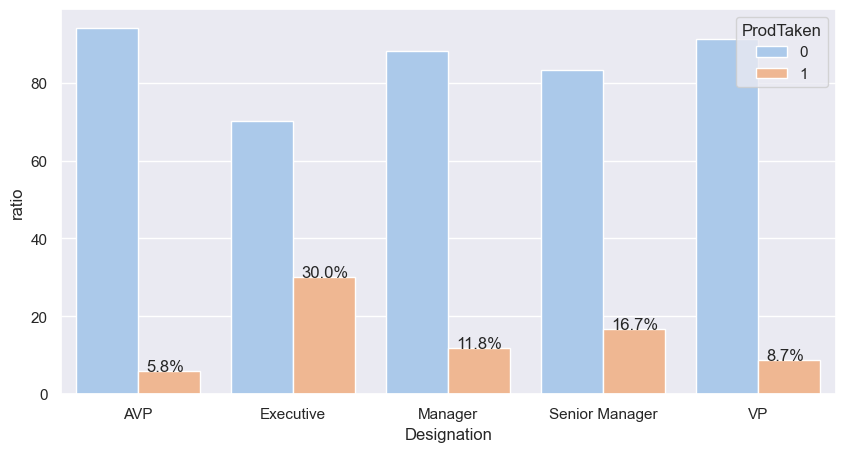

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(data=Designation_group, x='Designation',  y='ratio',hue='ProdTaken')
for i in range(5):
    plt.annotate(xy=[i+0.05,ycoor['ratio'][i]],text=str(round(ycoor['ratio'][i],1))+"%")

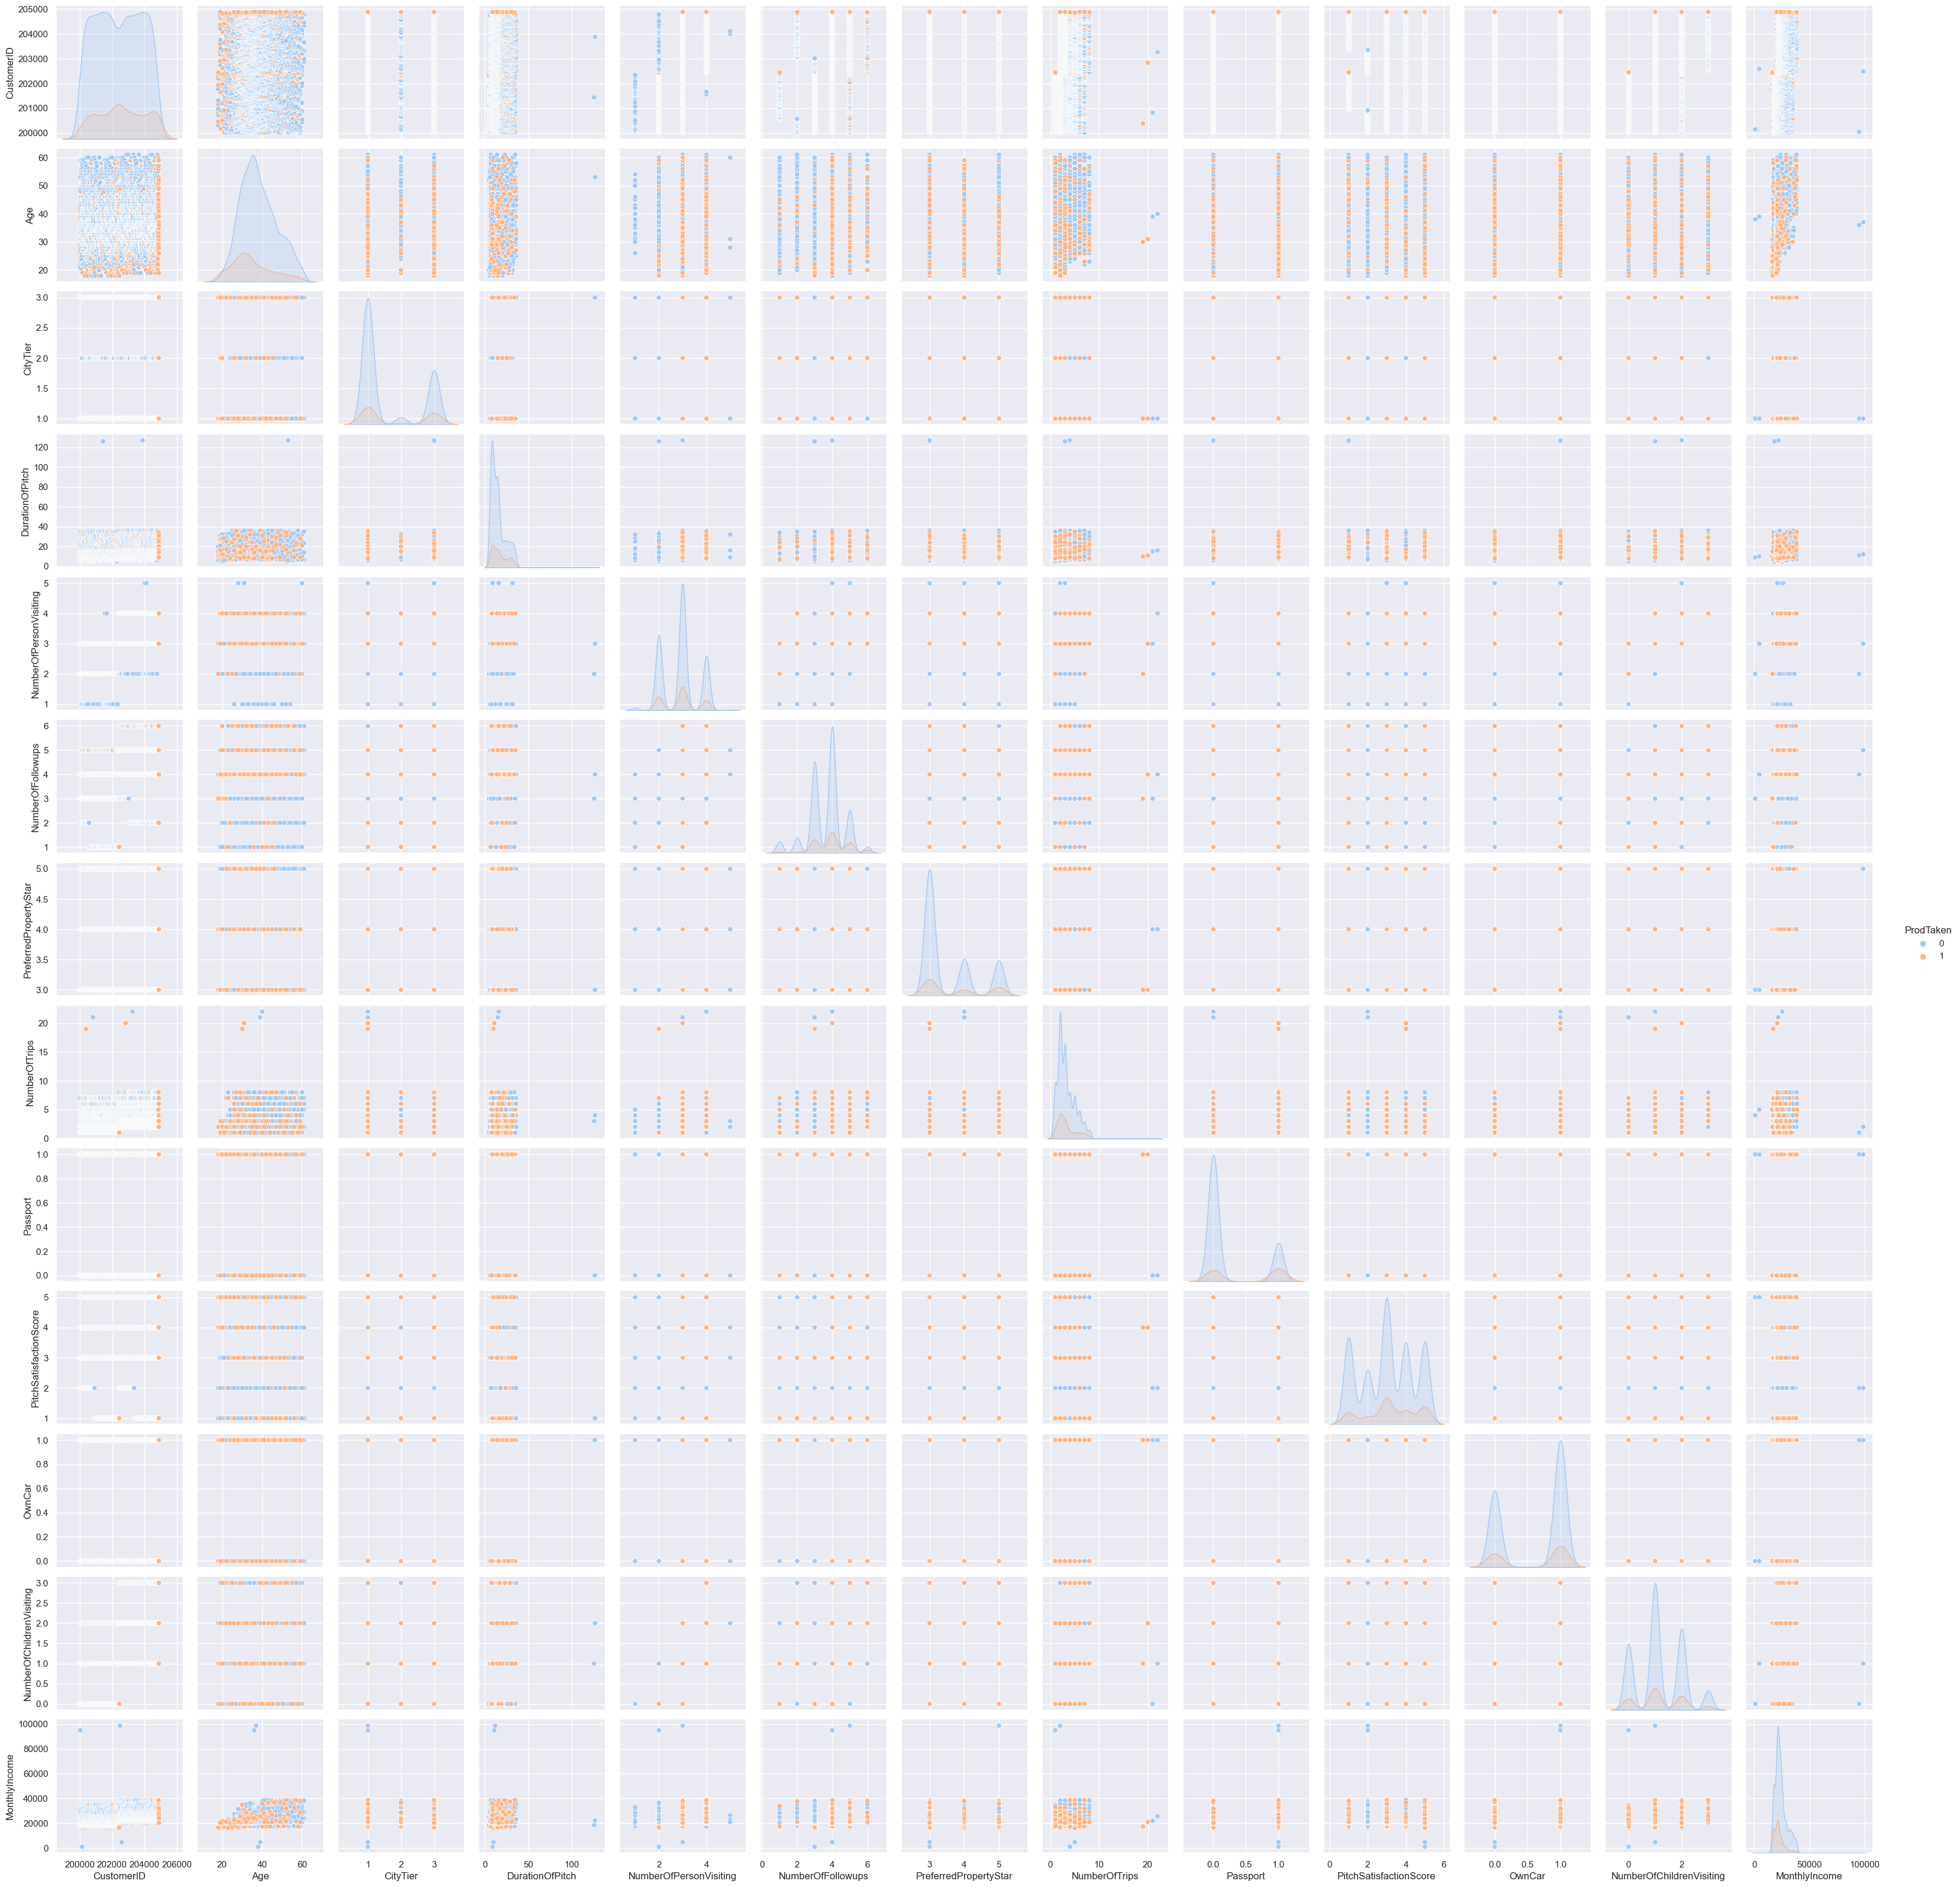

In [47]:
sns.pairplot(data=df,diag_kind='kde', hue='ProdTaken')

# **DATA PREPROCESSING**

In [48]:
df.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3986,203986,0,32.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,Basic,4.0,Single,3.0,0,3,1,1.0,Executive,21179.0
2194,202194,0,24.0,NaN,1,NaN,Small Business,Female,2,4.0,Deluxe,3.0,Married,2.0,0,3,0,0.0,Manager,NaN
2611,202611,0,31.0,Self Enquiry,3,12.0,Salaried,Female,3,4.0,Standard,3.0,Divorced,4.0,0,4,1,2.0,Senior Manager,28097.0
1445,201445,0,41.0,Self Enquiry,1,34.0,Salaried,Female,2,4.0,Super Deluxe,4.0,Married,1.0,0,5,1,1.0,AVP,28570.0
4865,204865,1,42.0,Company Invited,3,16.0,Salaried,Male,3,6.0,Super Deluxe,3.0,Married,2.0,0,5,1,2.0,AVP,24829.0


## Handling Missing Value

In [50]:
#ISI MISSING VALUE DATA NUMERICAL
# Menggunakan mean pada fitur Age, Karena data berdistribusi normal
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Menggunakan Median pada kolom DurationOfPitch dan MonthlyIncome, karena terdistribusi skewed dan mempunyai outlier
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [51]:
col_cat_missing = ['TypeofContact','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting']
for i in col_cat_missing:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [52]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64